## Custom Logistic Regression Class Creation & Use

This file is created to provide a clear understanding of the logic behind Logistic Regression. 
It demonstrates the mathematical foundation, including the sigmoid function, binary cross-entropy loss, 
and gradient descent optimization. The code also covers the training of a custom logistic regression model 
from scratch, making predictions, and visualizing results on a simple dataset.

### Data Generation
At first we generate a simple dataset to simulate a binary classification problem. The data is generated randomly, and the target variable is based on a linear decision boundary.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Create a simple dataset with 100 samples and 2 features
np.random.seed(42) # Seed for reproducibility
num_samples = 100
X = np.random.randn(num_samples, 2)  # 100 samples, 2 features

# Generate binary labels based on a linear decision boundary (sum of features)
y = (X[:, 0] + X[:, 1] > 0).astype(int)  # Labels: 1 if sum > 0, otherwise 0

### Implementation of Custom Logistic Regression Class
The following code implements Logistic Regression from scratch, including the core functions for **fitting the model**, **gradient descent**, and **prediction**.

**Key Sections:**
1. __init__ **(Initialization)**:

- Initializes the model with a **learning rate** and the number of **iterations** for gradient descent. The **weights** and **bias** are initially set to None and will be initialized later.

2. sigmoid **Function**:

- This is the **activation function** that converts the linear output of the model into a probability value between 0 and 1, essential for binary classification.

3. binary_cross_entropy **Function**:

- This function calculates the **binary cross-entropy loss**, a common loss function for binary classification problems. It measures how well the predicted probabilities match the true labels.

4. fit Function **(Training)**:

- **Weights and bias are initialized** to zeros.
- **Gradient Descent** is used to iteratively update the weights and bias. The gradients are calculated from the **partial derivatives** of the loss function with respect to the weights and bias.
- The model is updated over num_iterations iterations, and the loss is printed every 100 iterations to monitor training progress.
5. predict **Function**:

- Uses the **sigmoid function** to predict probabilities and applies a threshold (default = 0.5) to classify the input data as either 0 or 1 (binary output).

In [6]:
class LogisticRegression:
    def __init__(self, learning_rate=0.1, num_iterations=1000):
        # Initialize the model with learning rate and number of iterations for gradient descent
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        # Sigmoid activation function to map predictions to a range of (0, 1)
        return 1 / (1 + np.exp(-z))

    def binary_cross_entropy(self, y_true, y_pred):
        # Binary Cross-Entropy Loss function to evaluate prediction accuracy
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def fit(self, X, y):
        # Initialize weights and bias
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Gradient Descent optimization for specified number of iterations
        for i in range(self.num_iterations):
            # Calculate linear model output
            linear_model = np.dot(X, self.weights) + self.bias
            # Apply sigmoid to get predicted probabilities
            y_pred = self.sigmoid(linear_model)

            # Calculate loss using binary cross-entropy
            loss = self.binary_cross_entropy(y, y_pred)

            # Compute gradients for weights and bias
            dw = (1 / num_samples) * np.dot(X.T, (y_pred - y))  # Gradient for weights
            db = (1 / num_samples) * np.sum(y_pred - y)  # Gradient for bias

            # Update weights and bias using gradient descent
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Print the loss every 100 iterations for monitoring
            if i % 100 == 0:
                print(f'Iteration {i}, Loss: {loss}')

    def predict(self, X, threshold=0.5):
        # Predict the probability and convert it into binary output (0 or 1)
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        return (y_pred > threshold).astype(int)  # Return binary predictions based on threshold


### Training the Custom Logistic Regression Model
Now that the model is ready, we will instantiate and train it on the previous generated data using gradient descent.

In [7]:
# Instantiate and train the model
model = LogisticRegression(learning_rate=0.1, num_iterations=1000)

# Fit the model on the generated dataset (X, y)
model.fit(X, y)

Iteration 0, Loss: 0.6931471805599453
Iteration 100, Loss: 0.27332177611478076
Iteration 200, Loss: 0.20883170634992637
Iteration 300, Loss: 0.1789868434587051
Iteration 400, Loss: 0.16069325742917265
Iteration 500, Loss: 0.1479195197776137
Iteration 600, Loss: 0.13829971076025005
Iteration 700, Loss: 0.13068829889598935
Iteration 800, Loss: 0.12445280150783405
Iteration 900, Loss: 0.11921093669912308



### Predicting and Visualizing Results
After training the model, we use it to make predictions on the training data and visualize the original vs predicted results using scatter plots.

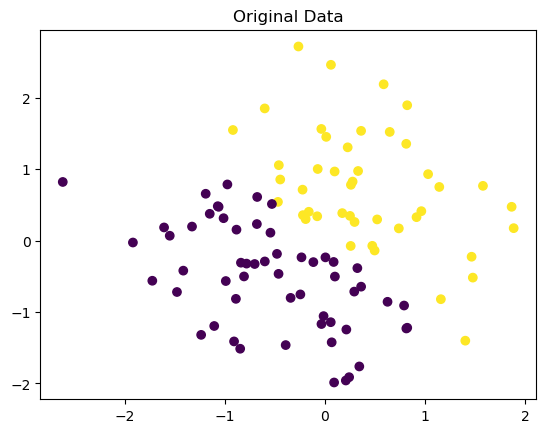

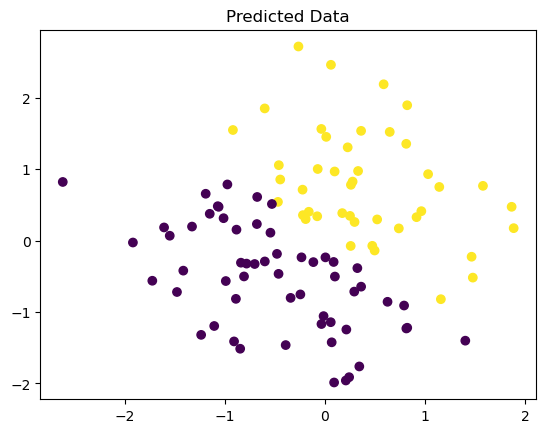

In [9]:
# Predicting on the training data
y_pred = model.predict(X)

# Visualizing the results
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Original Data')
plt.show()

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
plt.title('Predicted Data')
plt.show()